In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/daily-climate-time-series-data/DailyDelhiClimateTrain.csv
/kaggle/input/daily-climate-time-series-data/DailyDelhiClimateTest.csv


In [2]:
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/kaggle/input/daily-climate-time-series-data/DailyDelhiClimateTrain.csv')

In [4]:
df.shape

(1462, 5)

In [5]:
df.sample


<bound method NDFrame.sample of             date   meantemp    humidity  wind_speed  meanpressure
0     2013-01-01  10.000000   84.500000    0.000000   1015.666667
1     2013-01-02   7.400000   92.000000    2.980000   1017.800000
2     2013-01-03   7.166667   87.000000    4.633333   1018.666667
3     2013-01-04   8.666667   71.333333    1.233333   1017.166667
4     2013-01-05   6.000000   86.833333    3.700000   1016.500000
...          ...        ...         ...         ...           ...
1457  2016-12-28  17.217391   68.043478    3.547826   1015.565217
1458  2016-12-29  15.238095   87.857143    6.000000   1016.904762
1459  2016-12-30  14.095238   89.666667    6.266667   1017.904762
1460  2016-12-31  15.052632   87.000000    7.325000   1016.100000
1461  2017-01-01  10.000000  100.000000    0.000000   1016.000000

[1462 rows x 5 columns]>

In [6]:
X1=df[['date','meantemp']]

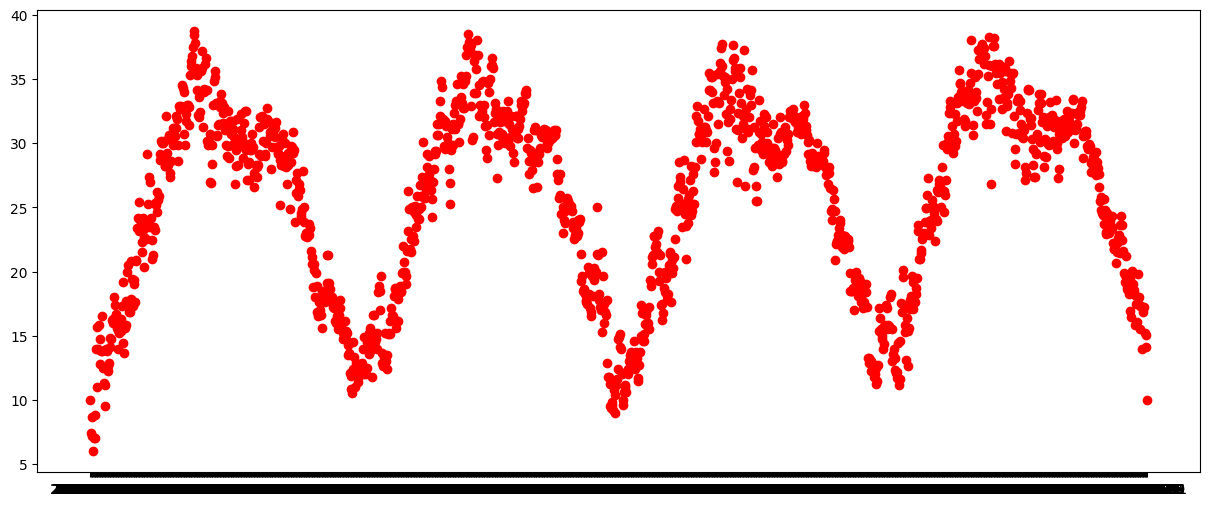

In [7]:
plt.figure(figsize=(15, 6))  
plt.scatter(df['date'],df['meantemp'],color='red')

In [8]:
X1=df['meantemp'].ewm(alpha=0.9).mean()

In [9]:
X1

0       10.000000
1        7.636364
2        7.213213
3        8.521452
4        6.252123
          ...    
1457    17.180754
1458    15.432361
1459    14.228950
1460    14.970263
1461    10.497026
Name: meantemp, Length: 1462, dtype: float64

In [10]:
df['ewm']=X1
df

,date,meantemp,humidity,wind_speed,meanpressure,ewm
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,10.000000
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,7.636364
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,7.213213
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,8.521452
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,6.252123
...,...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217,17.180754
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762,15.432361
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762,14.228950
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000,14.970263


In [11]:
X1

0       10.000000
1        7.636364
2        7.213213
3        8.521452
4        6.252123
          ...    
1457    17.180754
1458    15.432361
1459    14.228950
1460    14.970263
1461    10.497026
Name: meantemp, Length: 1462, dtype: float64

In [12]:
import matplotlib.pyplot as plt



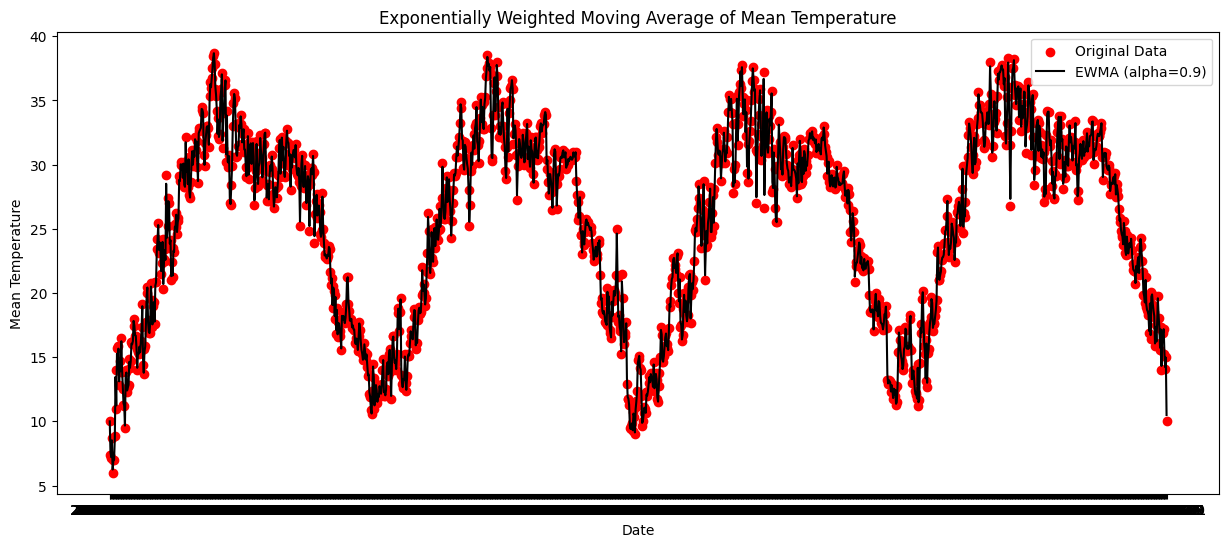

In [13]:
# Calculate EWMA with alpha = 0.9
df['ewm'] = df['meantemp'].ewm(alpha=0.9).mean()

# Plot original data and EWMA
plt.figure(figsize=(15, 6))
plt.scatter(df['date'], df['meantemp'], color='red', label='Original Data')
plt.plot(df['date'], df['ewm'], color='black', label='EWMA (alpha=0.9)')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Exponentially Weighted Moving Average of Mean Temperature')
plt.legend()
plt.show()